In [1]:
# Importer les modules nécessaires
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.preprocessing import LabelEncoder
# LabelEncoder est une classe qui permet de convertir des étiquettes catégorielles en valeurs numériques


In [2]:
# Lire le fichier CSV qui contient les données des clients d'une banque
data = pd.read_csv("bank_customers.csv")

# Afficher les données sous forme de tableau
data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [3]:
# Modifier l'option d'affichage de pandas pour voir toutes les colonnes des données
pd.set_option('display.max_columns', None)

# Afficher les cinq premières lignes du tableau
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [4]:
# Afficher les noms des colonnes des données
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [5]:
# Afficher la forme des données, c'est-à-dire le nombre de lignes et de colonnes du tableau
data.shape

(10127, 21)

In [6]:
# Supprimer la colonne CLIENTNUM des données, car elle n'est pas utile pour l'analyse
data=data.drop(['CLIENTNUM',], axis=1)
data

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [7]:
# Afficher le nombre de valeurs manquantes par colonne dans les données
# La méthode isna() renvoie un tableau booléen indiquant si les valeurs sont manquantes ou non
# La méthode sum() calcule la somme des valeurs par colonne
data.isna().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [8]:
# Afficher les types de données de chaque colonne dans les données
# La méthode dtypes renvoie une série contenant le type de données de chaque colonne
data.dtypes

Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [9]:
# Afficher les valeurs uniques de la colonne Attrition_Flag
data.Attrition_Flag.unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [10]:
# Créer une instance de la classe LabelEncoder
le = LabelEncoder()

# Transformer les valeurs catégorielles de la colonne Attrition_Flag en valeurs numériques
# La méthode fit_transform apprend les correspondances entre les catégories et les nombres, et les applique aux données
# Les valeurs numériques sont stockées dans la même colonne Attrition_Flag
data['Attrition_Flag'] = le.fit_transform(data['Attrition_Flag'])

In [11]:
# Afficher les nouvelles valeurs uniques de la colonne Attrition_Flag
data.Attrition_Flag.unique()

array([1, 0])

In [12]:
# Afficher les valeurs uniques de la colonne Gender
data.Gender.unique()

array(['M', 'F'], dtype=object)

In [13]:
# Transformer les valeurs catégorielles de la colonne Gender en valeurs numériques
# La méthode fit_transform apprend les correspondances entre les catégories et les nombres, et les applique aux données
# Les valeurs numériques sont stockées dans la même colonne Gender
data['Gender'] = le.fit_transform(data['Gender'])

In [14]:
# Afficher les nouvelles valeurs uniques de la colonne Gender
data.Gender.unique()

array([1, 0])

In [15]:
# Afficher les valeurs uniques de la colonne Education_Level
data.Education_Level.unique()

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [16]:
# Transformer les valeurs catégorielles de la colonne Education_Level en valeurs numériques
# La méthode fit_transform apprend les correspondances entre les catégories et les nombres, et les applique aux données
# Les valeurs numériques sont stockées dans la même colonne Education_Level
data['Education_Level'] = le.fit_transform(data['Education_Level'])

In [17]:
# Afficher les nouvelles valeurs uniques de la colonne Education_Level
data.Education_Level.unique()

array([3, 2, 5, 6, 0, 4, 1])

In [18]:
# Afficher les valeurs uniques de la colonne Marital_Status
data.Marital_Status.unique()

array(['Married', 'Single', 'Unknown', 'Divorced'], dtype=object)

In [19]:
# Transformer les valeurs catégorielles de la colonne Marital_Status en valeurs numériques
# La méthode fit_transform apprend les correspondances entre les catégories et les nombres, et les applique aux données
# Les valeurs numériques sont stockées dans la même colonne Marital_Status
data['Marital_Status'] = le.fit_transform(data['Marital_Status'])

In [20]:
# Afficher les nouvelle valeurs uniques de la colonne Marital_Status
data.Marital_Status.unique()

array([1, 2, 3, 0])

In [21]:
# Afficher les valeurs uniques de la colonne Income_Category
data.Income_Category.unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

In [22]:
# Transformer les valeurs catégorielles de la colonne Income_Category en valeurs numériques
# La méthode fit_transform apprend les correspondances entre les catégories et les nombres, et les applique aux données
# Les valeurs numériques sont stockées dans la même colonne Income_Category
data['Income_Category'] = le.fit_transform(data['Income_Category'])

In [23]:
# Afficher les nouvelles valeurs uniques de la colonne Income_Category
data.Income_Category.unique()

array([2, 4, 3, 1, 0, 5])

In [24]:
# Afficher les valeurs uniques de la colonne Card_Category
data.Card_Category.unique()

array(['Blue', 'Gold', 'Silver', 'Platinum'], dtype=object)

In [25]:
# Transformer les valeurs catégorielles de la colonne Card_Category en valeurs numériques
# La méthode fit_transform apprend les correspondances entre les catégories et les nombres, et les applique aux données
# Les valeurs numériques sont stockées dans la même colonne Card_Category
data['Card_Category'] = le.fit_transform(data['Card_Category'])

In [26]:
# Afficher les nouvelles valeurs uniques de la colonne Card_Category
data.Card_Category.unique()

array([0, 1, 3, 2])

In [27]:
data


,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,1,3,3,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,0,5,2,2,4,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,1,3,2,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,0,4,3,3,4,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,40,1,3,5,1,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,1,50,1,2,2,2,1,0,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,0,41,1,2,6,0,1,0,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,0,44,0,1,3,1,4,0,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,0,30,1,2,2,3,1,0,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [28]:
# Afficher les types de données de chaque colonne dans les données
# La méthode dtypes renvoie une série contenant le type de données de chaque colonne
data.dtypes

Attrition_Flag                int32
Customer_Age                  int64
Gender                        int32
Dependent_count               int64
Education_Level               int32
Marital_Status                int32
Income_Category               int32
Card_Category                 int32
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

<Axes: >

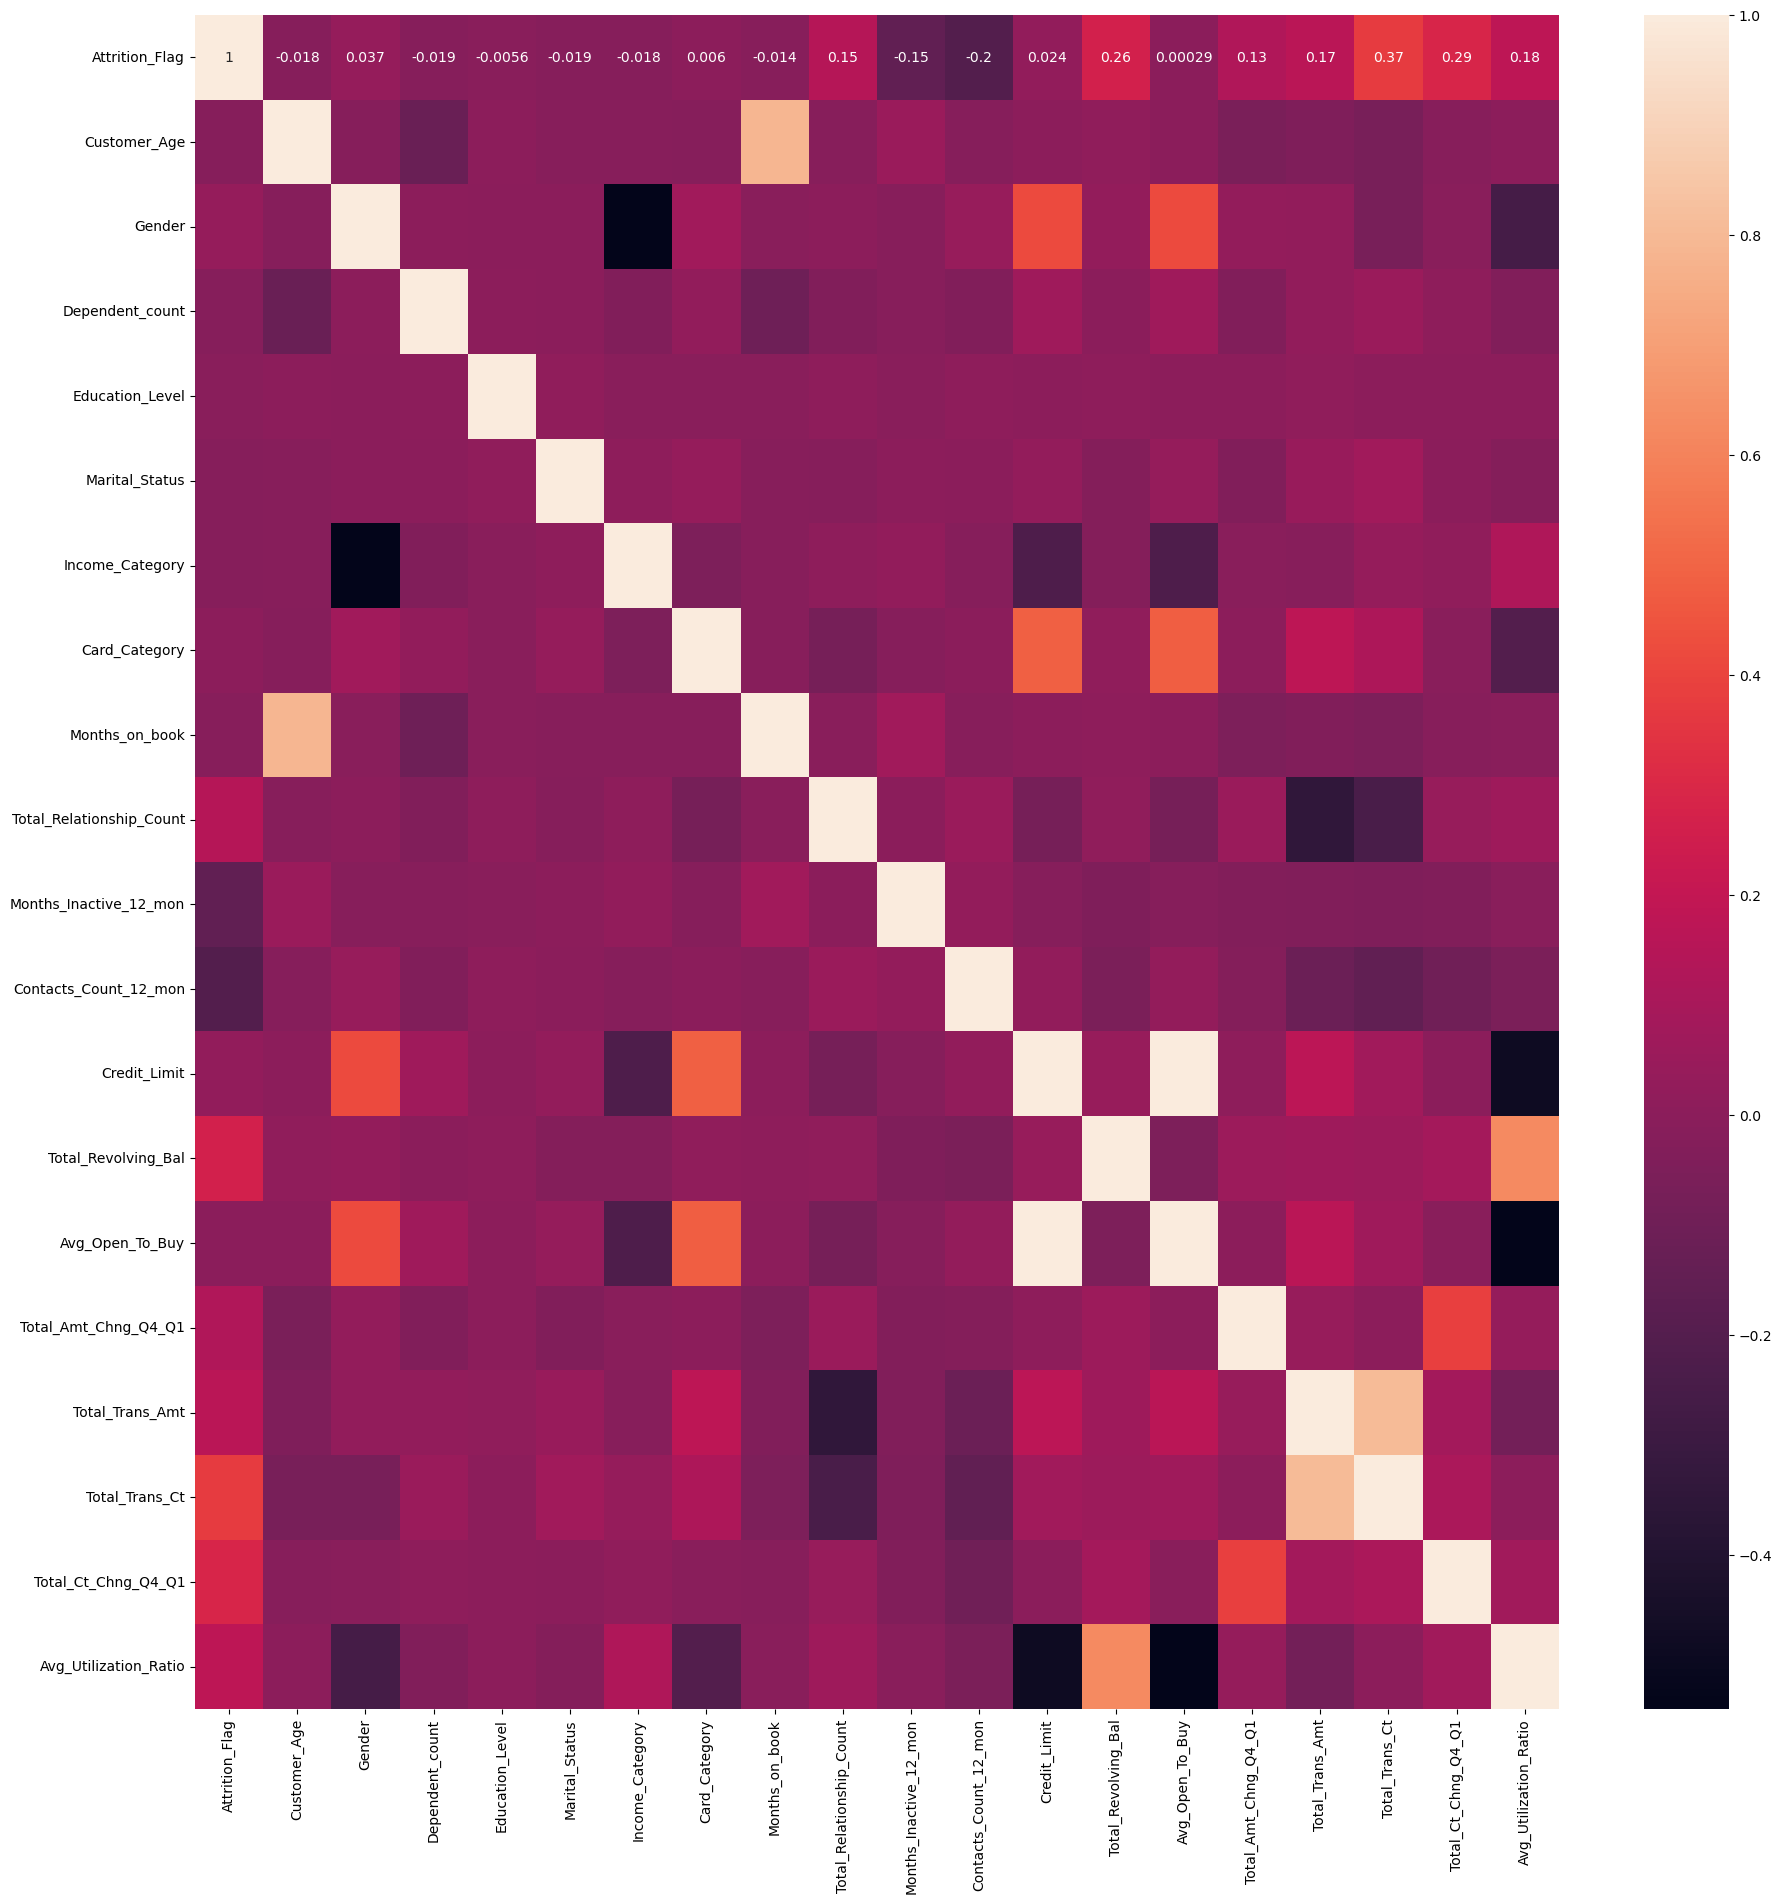

In [29]:
# Créer une figure de taille 22x22 pouces
plt.figure(figsize=(22,22))

# Afficher une carte de chaleur des corrélations entre les colonnes des données
# La méthode corr() calcule la matrice de corrélation des données
# La méthode heatmap() trace une carte de chaleur à partir d'une matrice de données
# Le paramètre annot=True permet d'afficher les valeurs des corrélations sur la carte
sns.heatmap(data.corr(),annot=True)

In [30]:
# Séparer les données en deux variables : X et y
# X contient toutes les colonnes sauf Attrition_Flag, qui est la variable cible à prédire
# y contient uniquement la colonne Attrition_Flag, qui indique si le client a quitté la banque ou non
X = data.drop(["Attrition_Flag"],axis=1)
y = data[["Attrition_Flag"]]

In [31]:
# Importer la fonction train_test_split du sous-module sklearn.model_selection
from sklearn.model_selection import train_test_split

# Diviser les données en deux ensembles : un ensemble d'entraînement et un ensemble de test
# L'ensemble d'entraînement contient 70% des données, et l'ensemble de test contient 30% des données
# La fonction train_test_split renvoie quatre variables : X_train, X_test, y_train, y_test
# X_train et y_train contiennent les variables explicatives et la variable cible de l'ensemble d'entraînement
# X_test et y_test contiennent les variables explicatives et la variable cible de l'ensemble de test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30)

In [32]:
# Importer la classe StandardScaler du sous-module sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

# Créer une instance de la classe StandardScaler
scaler = StandardScaler()

# Appliquer la normalisation des données à l'ensemble d'entraînement
# La méthode fit_transform apprend les paramètres de la normalisation (moyenne et écart-type) et les applique aux données
# Les données normalisées sont stockées dans la variable X_train_sc
X_train_sc = scaler.fit_transform(X_train)

# Appliquer la normalisation des données à l'ensemble de test
# La méthode transform utilise les paramètres de la normalisation appris sur l'ensemble d'entraînement et les applique aux données
# Les données normalisées sont stockées dans la variable X_test_sc
X_test_sc = scaler.transform(X_test)


In [33]:
X_train_sc

array([[ 0.20855555,  1.06745054,  2.03744881, ...,  2.03312521,
         0.27273053,  0.18375366],
       [-1.15650987, -0.93681156,  0.50047168, ..., -1.4091004 ,
        -2.99296959,  1.80325475],
       [ 0.58084612, -0.93681156,  0.50047168, ..., -0.07523798,
        -0.04208632,  0.98630642],
       ...,
       [-0.28783187, -0.93681156,  0.50047168, ..., -0.80671092,
        -0.2939398 , -1.00028158],
       [-1.40470358, -0.93681156, -0.26801689, ...,  1.25862444,
         1.02829097,  1.03309201],
       [-1.52880044,  1.06745054,  1.26896024, ..., -0.80671092,
         2.4638558 , -0.73756251]])

In [34]:
# Importer la bibliothèque keras
import keras

# Importer les classes Sequential, Dense et Activation du module keras.models
from keras.models import Sequential
from keras.layers import Dense

In [35]:
# Créer un modèle séquentiel vide
classifier = Sequential()

# Ajouter une couche dense avec 20 unités, une initialisation uniforme des poids, une fonction d'activation relu et une dimension d'entrée égale au nombre de colonnes de X_train
classifier.add(Dense(units = 20,kernel_initializer ="uniform",activation = "relu",input_dim = X_train.shape[1]))

# Ajouter une deuxième couche dense avec 50 unités, une initialisation uniforme des poids et une fonction d'activation relu
classifier.add(Dense(units = 50,kernel_initializer = "uniform",activation="relu"))

# Ajouter une troisième couche dense avec 50 unités, une initialisation uniforme des poids et une fonction d'activation relu
classifier.add(Dense(units = 50,kernel_initializer = "uniform",activation="relu"))

# Ajouter une quatrième couche dense avec 1 unité, une initialisation uniforme des poids et une fonction d'activation sigmoid
# Cette couche représente la sortie du modèle, qui est une probabilité entre 0 et 1
classifier.add(Dense(units = 1,kernel_initializer = "uniform",activation = "sigmoid"))

In [36]:
#afficher le nombres de colonnes et de ligne du dataset
data.shape

(10127, 20)

In [37]:
# Compiler le modèle en utilisant l'optimiseur adam, la fonction de coût binary_crossentropy et la métrique accuracy
classifier.compile(optimizer = "adam",loss ="binary_crossentropy",metrics=["accuracy"])

In [38]:
# Entraîner le modèle sur l'ensemble d'entraînement normalisé, avec une taille de lot de 10, un nombre d'époques de 100 et une validation croisée de 20%
# La méthode fit renvoie un objet historique qui contient les valeurs de la fonction de coût et de la métrique à chaque époque
model = classifier.fit(X_train_sc,y_train,batch_size=10,epochs = 15,validation_split=0.2)

Epoch 1/15
567/567 [==============================] - 5s 7ms/step - loss: 0.3204 - accuracy: 0.8695 - val_loss: 0.2441 - val_accuracy: 0.9196
Epoch 2/15
567/567 [==============================] - 4s 6ms/step - loss: 0.2139 - accuracy: 0.9180 - val_loss: 0.2013 - val_accuracy: 0.9224
Epoch 3/15
567/567 [==============================] - 3s 6ms/step - loss: 0.1932 - accuracy: 0.9250 - val_loss: 0.1940 - val_accuracy: 0.9238
Epoch 4/15
567/567 [==============================] - 3s 5ms/step - loss: 0.1869 - accuracy: 0.9252 - val_loss: 0.1927 - val_accuracy: 0.9238
Epoch 5/15
567/567 [==============================] - 3s 6ms/step - loss: 0.1824 - accuracy: 0.9265 - val_loss: 0.1915 - val_accuracy: 0.9196
Epoch 6/15
567/567 [==============================] - 3s 6ms/step - loss: 0.1804 - accuracy: 0.9250 - val_loss: 0.1863 - val_accuracy: 0.9231
Epoch 7/15
567/567 [==============================] - 3s 6ms/step - loss: 0.1775 - accuracy: 0.9293 - val_loss: 0.1881 - val_accuracy: 0.9252
Epoch 

In [39]:
# Importer le module matplotlib.pyplot
import matplotlib.pyplot as plt

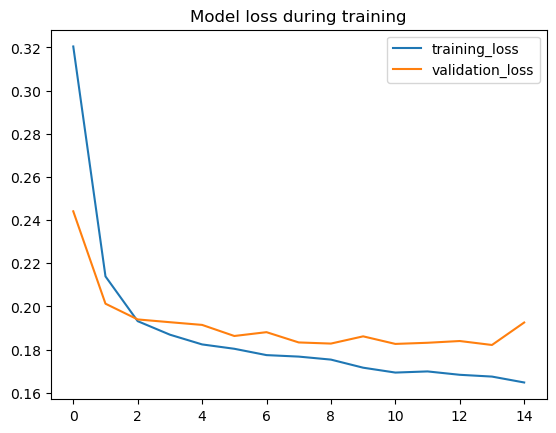

In [40]:
# Afficher la courbe de la fonction de coût du modèle pendant l'entraînement
# La fonction de coût mesure l'erreur entre les prédictions du modèle et les valeurs réelles
# La méthode plot trace une courbe à partir d'une liste de valeurs
# Le paramètre label permet de nommer la courbe pour la légende
plt.plot(model.history["loss"], label="training_loss")

# Afficher la courbe de la fonction de coût du modèle pendant la validation
# La validation permet d'évaluer le modèle sur un sous-ensemble des données d'entraînement qui n'est pas utilisé pour l'apprentissage
# La fonction de coût de validation mesure l'erreur entre les prédictions du modèle et les valeurs réelles sur le sous-ensemble de validation
plt.plot(model.history["val_loss"], label="validation_loss")

# Ajouter un titre au graphique
plt.title("Model loss during training")

# Afficher la légende des courbes
plt.legend()

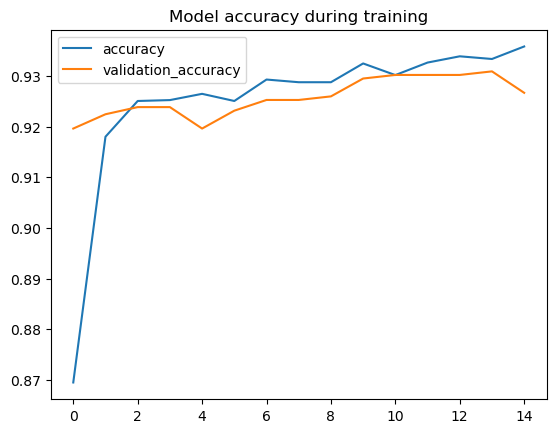

In [41]:
# Afficher la courbe de la métrique du modèle pendant l'entraînement
# La métrique mesure la performance du modèle selon un critère choisi
# Ici, la métrique est l'accuracy, qui correspond au taux de bonnes prédictions
plt.plot(model.history["accuracy"], label="accuracy")

# Afficher la courbe de la métrique du modèle pendant la validation
# La métrique de validation mesure la performance du modèle sur le sous-ensemble de validation selon le même critère
plt.plot(model.history["val_accuracy"], label="validation_accuracy")

# Ajouter un titre au graphique
plt.title("Model accuracy during training")

# Afficher la légende des courbes
plt.legend()

In [42]:
# Prédire les classes des données de test à partir du modèle
# La méthode predict renvoie une probabilité entre 0 et 1 pour chaque donnée de test
# Pour obtenir une classe binaire (0 ou 1), on utilise un seuil de 0.5
# Si la probabilité est supérieure à 0.5, la classe prédite est 1, sinon elle est 0
y_pred = classifier.predict(X_test)
y_pred = (y_pred >0.5)

95/95 [==============================] - 1s 5ms/step


<Axes: >

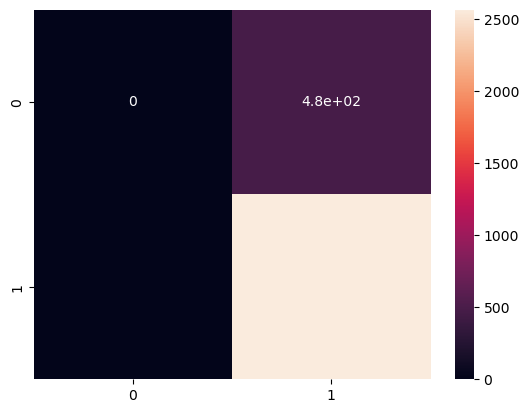

In [43]:
# Importer la fonction confusion_matrix du sous-module sklearn.metrics
from sklearn.metrics import confusion_matrix

# Calculer la matrice de confusion entre les classes réelles et les classes prédites
# La matrice de confusion est un tableau qui indique le nombre de bonnes et de mauvaises prédictions pour chaque classe
# La diagonale de la matrice contient le nombre de bonnes prédictions, et les autres cases contiennent le nombre de mauvaises prédictions
cm = confusion_matrix(y_test,y_pred)

# Importer le module seaborn
import seaborn as sns

# Afficher la matrice de confusion sous forme de carte de chaleur
# La méthode heatmap trace une carte de chaleur à partir d'une matrice de données
# Le paramètre annot=True permet d'afficher les valeurs de la matrice sur la carte
sns.heatmap(cm,annot=True)